In [1]:
from PIL import Image
import numpy as np
import pandas as pd

# Ruta del archivo JP2
#ruta_archivo_jp2 = r'C:/Users/Josemanuel/Desktop/Tesina/Data/VALPO/5.jp2' #"imagen.jp2"

# Abre el archivo JP2
#imagen = Image.open(ruta_archivo_jp2)

# Muestra la imagen
#imagen.show()

# También puedes convertir la imagen a un array de numpy para procesarla
#array_imagen = np.array(imagen)

In [2]:
Image.MAX_IMAGE_PIXELS = None

# Ruta del archivo JP2
ruta_archivo_jp2 = r'C:/Users/Josemanuel/Desktop/Tesina/Data/VALPO/5.jp2'

# Abre el archivo JP2
imagen = Image.open(ruta_archivo_jp2)

# Muestra la imagen
imagen.show()

In [3]:
# Abre el archivo JP2
imagen = Image.open(ruta_archivo_jp2)

# Convierte la imagen en un array de NumPy
array_imagen = np.array(imagen)

# Obtiene las dimensiones de la imagen
alto, ancho = imagen.size

# Crea un DataFrame de pandas con los datos del array de la imagen
columnas = [f'Pixel_{i}' for i in range(ancho)]
filas = [f'Row_{i}' for i in range(alto)]
df_imagen = pd.DataFrame(array_imagen.reshape(alto, ancho), index=filas, columns=columnas)

# Muestra el DataFrame
print(array_imagen)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


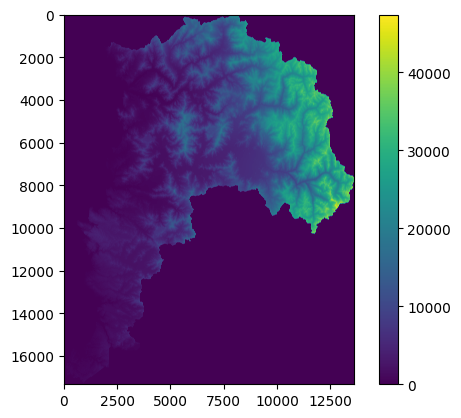

In [4]:
import matplotlib.pyplot as plt

# Muestra la imagen utilizando imshow
plt.imshow(array_imagen)
#plt.axis('off')  # Para quitar los ejes
plt.colorbar()
plt.show()

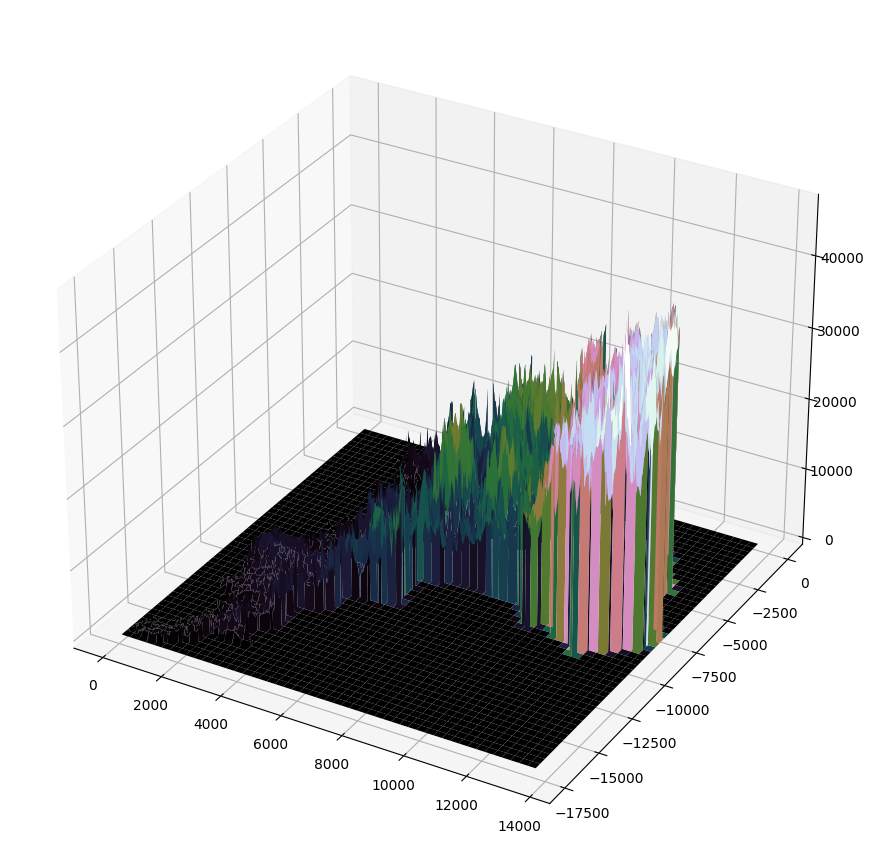

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Crear figura y ejes 3D
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')

# Obtener dimensiones de la imagen
alto, ancho = array_imagen.shape

# Crear una cuadrícula de coordenadas
x = np.arange(ancho)
y = np.arange(alto)
X, Y = np.meshgrid(x, y)

# Convertir la imagen a escala de grises (solo si tiene más de un canal)
#if canales > 1:
    #array_imagen_gris = array_imagen.mean(axis=2)
#else:
    #array_imagen_gris = array_imagen

# Plotear la superficie tridimensional
ax.plot_surface(X, -Y, array_imagen, cmap='cubehelix')


plt.show()


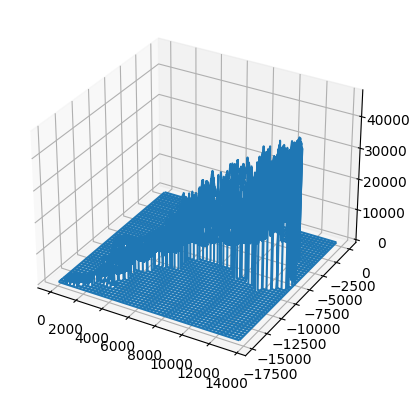

In [11]:
from mpl_toolkits.mplot3d import axes3d

#plt.style.use('_mpl-gallery')

# Make data
# Obtener dimensiones de la imagen
alto, ancho = array_imagen.shape

# Crear una cuadrícula de coordenadas
x = np.arange(ancho)
y = np.arange(alto)
X, Y = np.meshgrid(x, y)


# Plot
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X, -Y, array_imagen,cmap='inferno')#, rstride=10, cstride=10)

plt.show()

In [22]:
import plotly.graph_objects as go

# Crear figura 3D
fig = go.Figure(data=[go.Surface(z=array_imagen)])

# Configurar el diseño
fig.update_layout(scene=dict(aspectratio=dict(x=2, y=1, z=0.5),
                             xaxis=dict(range=[0, ancho], autorange=False),
                             yaxis=dict(range=[0, alto], autorange=False),
                             zaxis=dict(range=[0, 255], autorange=False)))

# Mostrar la figura interactiva
fig.show()

In [8]:
import plotly.graph_objects as go

# Crear una cuadrícula de coordenadas
x = np.arange(ancho)
y = np.arange(alto)
X, Y = np.meshgrid(x, -y)  # Invierte el eje Y para reflejar la imagen

# Crear la figura tridimensional
fig = go.Figure(data=[go.Surface(x=X, y=Y, z=array_imagen, colorscale='Viridis')])

# Actualizar las etiquetas de los ejes
fig.update_layout(scene=dict(xaxis_title='X', yaxis_title='-Y', zaxis_title='Z'))

# Mostrar la figura
fig.show()